/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


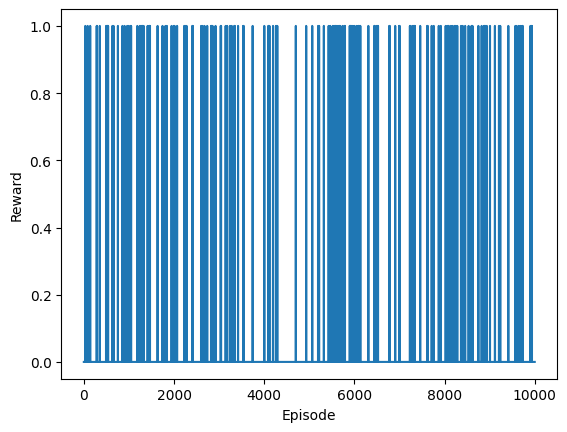

In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt

# Initialize the Q-table
env = gym.make('FrozenLake-v1')
num_states = env.observation_space.n
num_actions = env.action_space.n
Q = np.zeros((num_states, num_actions))

# Define the epsilon-greedy policy
epsilon = 0.9

# Define the learning parameters
alpha = 0.85
gamma = 0.95

# Initialize the rewards list
rewards = []

# Iterate through episodes
for episode in range(10000):
    state = env.reset()
    total_reward = 0

    # Iterate through steps
    for step in range(100):
        # Choose an action based on the epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])

        # Take a step in the environment and get the reward and the next state
        next_state, reward, done, _ = env.step(action)

        # Update the Q-value
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])

        # Update the state
        state = next_state

        # Add the reward to the total reward
        total_reward += reward

        # Break the loop if the episode is done
        if done:
            break

    # Add the total reward to the rewards list
    rewards.append(total_reward)

# Plot the rewards
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()